In [60]:
#importo las librerias con las q trabajaré en el notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#cargo el csv con los datos preprocesados

df20 = pd.read_csv('./datos/datos2020.csv', parse_dates=['fecha'])
df20.dropna(subset=['id'], inplace=True)

In [3]:
#revisión de completitud, tipo y memoria del dataframe
df20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163393 entries, 0 to 163393
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                163393 non-null  object        
 1   fecha             163393 non-null  datetime64[ns]
 2   codigo_localidad  163393 non-null  float64       
 3   nombre_localidad  163393 non-null  object        
 4   edad              163393 non-null  object        
 5   unidad_edad       163373 non-null  object        
 6   genero            163393 non-null  object        
 7   red               163393 non-null  object        
 8   tipo_incidente    163393 non-null  object        
 9   prioridad         163393 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 13.7+ MB


**Se evidencia...**

A priori todas las columnas parecen tener datos no nulos, a excepcion de la columna de edad. El plan para revisar los datos será el siguiente:

**1.** Revisar que los *codigo_de_localidad* apunten a un solo *nombre_localidad*. Si se presenta duplicidad de nombre, se ajustará para que cumpla con la condición 1:1

**2.** Revisar el atributo de *edad*, hacer tratamiento a nulos y lograr que la columna sea de tipo int para mejorar el posterior analisis

**3.** Revisar la variable *unidad_edad*, evaluando las diferentes categorias y rectificando si vale la pena tener esta columna

**4.** Llevar el atributo de *genero* como una variable categorica de limitadas opciones 

**5.** Para las variables *red*, *tipo_incidente* y *prioridad* se revisará convertirse en variables categoricas sin tener duplicidad de una misma a causa de errores ortograficos o derivados

In [103]:
#Se procede a ver el cruce de nombre_localidad y su codigo_localidad en una tabla cruzada
df20['codigo_localidad'] = df20['codigo_localidad'].astype(int)
pd.crosstab(df20['nombre_localidad'], df20['codigo_localidad']).head(50)

codigo_localidad,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
nombre_localidad,,,,,,,,,,,,,,,,,,,,
Antonio Nariño,0,0,0,0,0,0,0,0,0,0,0,0,0,0,558,0,0,0,0,0
Barrios Unidos,0,0,0,0,0,0,0,0,0,0,0,1254,0,0,0,0,0,0,0,0
Bosa,0,0,0,0,0,0,4203,0,0,0,0,0,0,0,0,0,0,0,0,0
Chapinero,0,758,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ciudad Bolívar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2058,0
Engativ,0,0,0,0,0,0,0,0,0,1270,0,0,0,0,0,0,0,0,0,0
Engativá,0,0,0,0,0,0,0,0,0,1464,0,0,0,0,0,0,0,0,0,0
Fontib¢n,0,0,0,0,0,0,0,0,599,0,0,0,0,0,0,0,0,0,0,0
Fontibón,0,0,0,0,0,0,0,0,1504,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#Creo un diccionario con un solo nombre para poder reemplazar la columna del nombre de localidad
localidad_dicc = {1 : 'Usaquen', 
                  2 : 'Chapinero',
                  3 : 'Santa Fe',
                  4 : 'San Cristobal',
                  5 : 'Usme',
                  6 : 'Tunjuelito',
                  7 : 'Bosa',
                  8 : 'Kennedy',
                  9 : 'Fontibon',
                  10 : 'Engativa',
                  11 : 'Suba',
                  12 : 'Barrios Unidos',
                  13 : 'Teusaquillo',
                  14 : 'Los Martires',
                  15 : 'Antonio Nariño',
                  16 : 'Puente Aranda',
                  17 : 'La Candelaria',
                  18 : 'Rafael Uribe Uribe',
                  19 : 'Ciudad Bolivar',
                  20 : 'Sumapaz'}

In [5]:
df20['nombre_localidad'] = df20['codigo_localidad'].apply(lambda x: localidad_dicc.get(x))
df20['nombre_localidad'].value_counts()

Kennedy               22073
Suba                  17428
Engativa              16435
Bosa                  12620
Ciudad Bolivar        11871
Puente Aranda          9189
San Cristobal          9052
Rafael Uribe Uribe     8542
Fontibon               8079
Usaquen                8038
Usme                   7385
Tunjuelito             5256
Los Martires           5104
Santa Fe               5033
Teusaquillo            4442
Barrios Unidos         4441
Chapinero              4316
Antonio Nariño         3202
La Candelaria           876
Sumapaz                  11
Name: nombre_localidad, dtype: int64

***Ya se garantiza que no hay varios nombres para un mismo codigo de localidad***

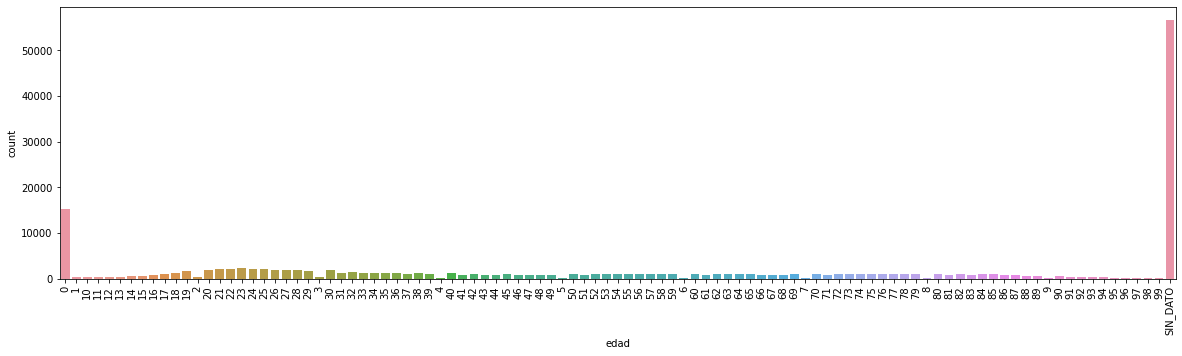

In [163]:
plt.figure(figsize=(20,5))
sns.countplot(x=df20['edad'].sort_values())
plt.xticks(rotation = 90)

plt.show()

*Al revisar la cantidad de registros para cada valor distinto de **Edad** se evidencia que no seria correcto borrar todos los registros "SIN_DATO" porque nos quedariamos sin la mayoría de los registros. *

*Igualmente se observa que el valor 0 tiene particularmente un valor alto, lo que puede llevar a pensar q tambien es una manera de marcar la ausencia de dato de edad*

*Por tal motivo se procede a dejar con valor 0 los datos que contienen 0 y los "SIN_DATO", de esta manera se podrá trabajar con datos numéricos para un mejor analisis*

In [13]:
df20['edad'].replace('SIN_DATO', '0', inplace=True)
df20['edad'] = df20['edad'].astype(int)

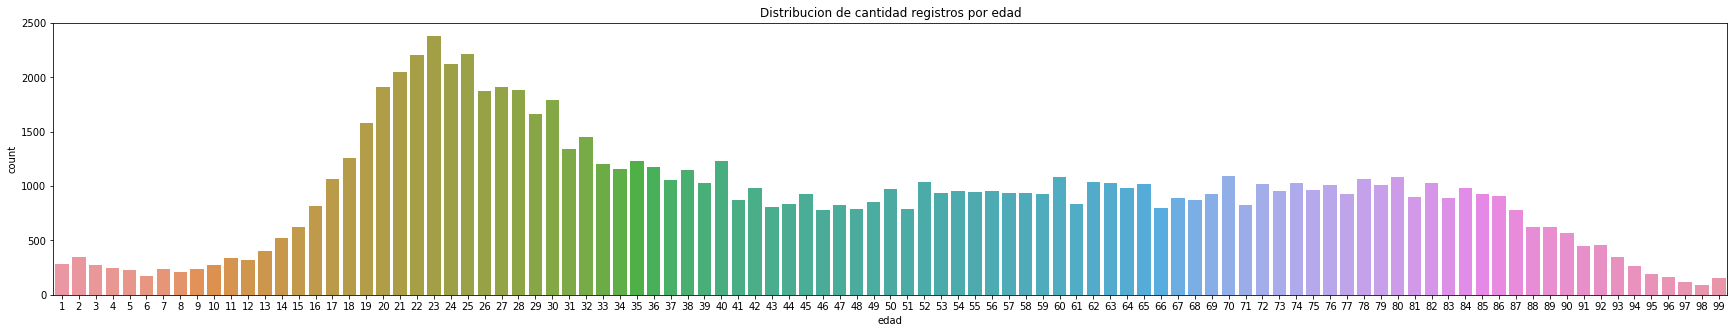

In [27]:
plt.figure(figsize=(30,5))
sns.countplot(df20[df20['edad'] > 0]['edad'])
plt.title('Distribucion de cantidad registros por edad')
plt.show()

*Ya se tendría una variable numerica de edad con la distribucion mostrada arriba*

In [30]:
df20['unidad_edad'].value_counts()

SIN_DATO    71909
Años        46726
A¤os        43810
Meses         737
Dias          118
Horas          73
Name: unidad_edad, dtype: int64

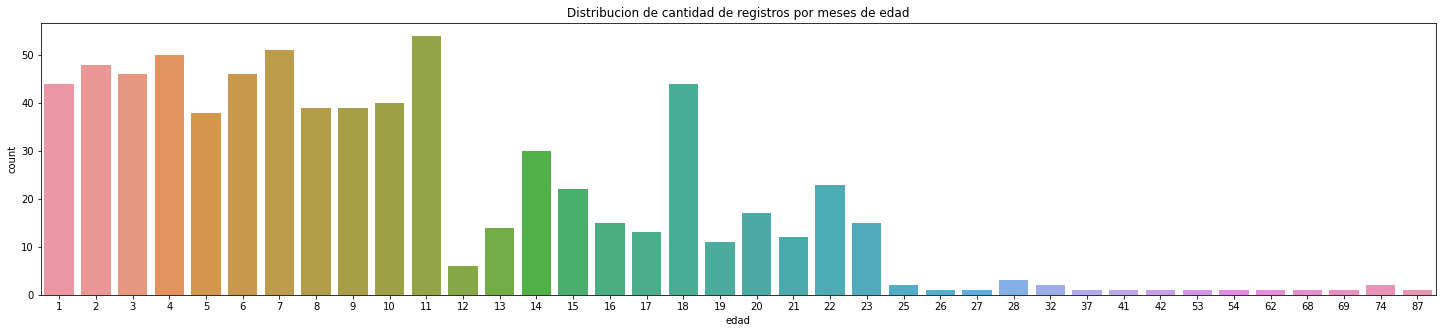

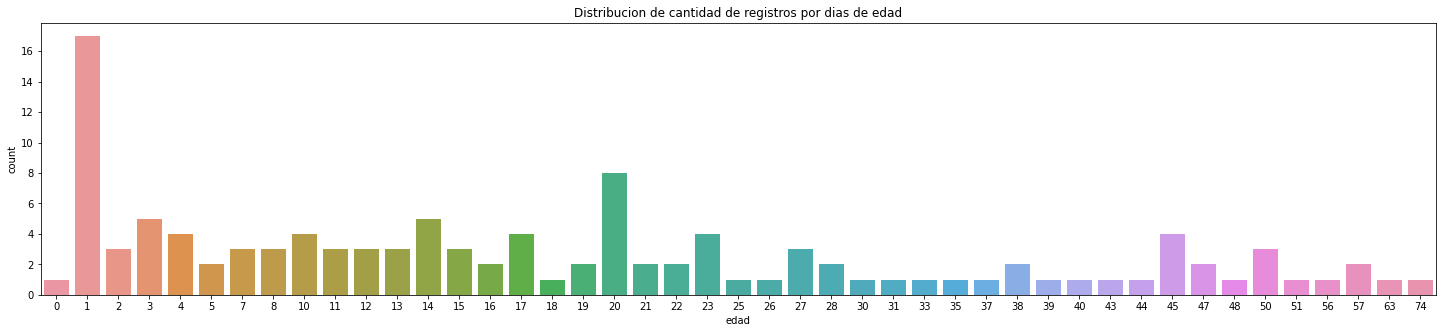

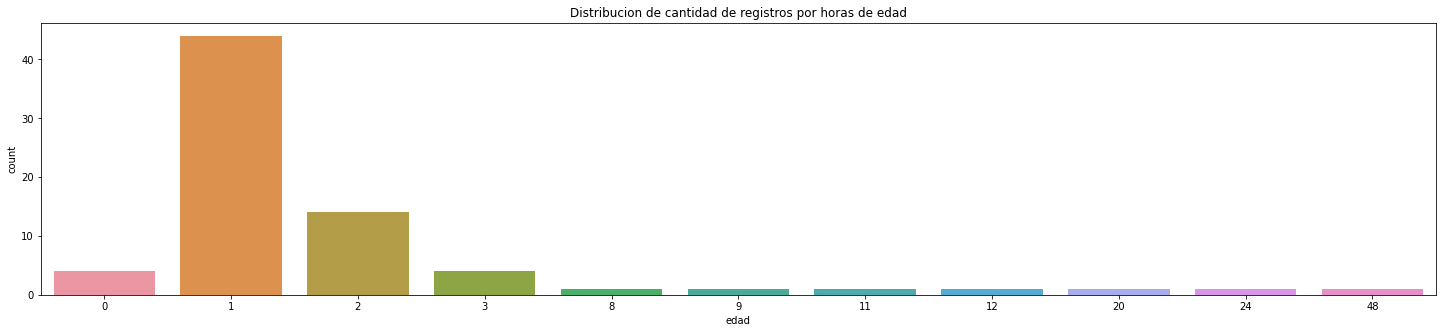

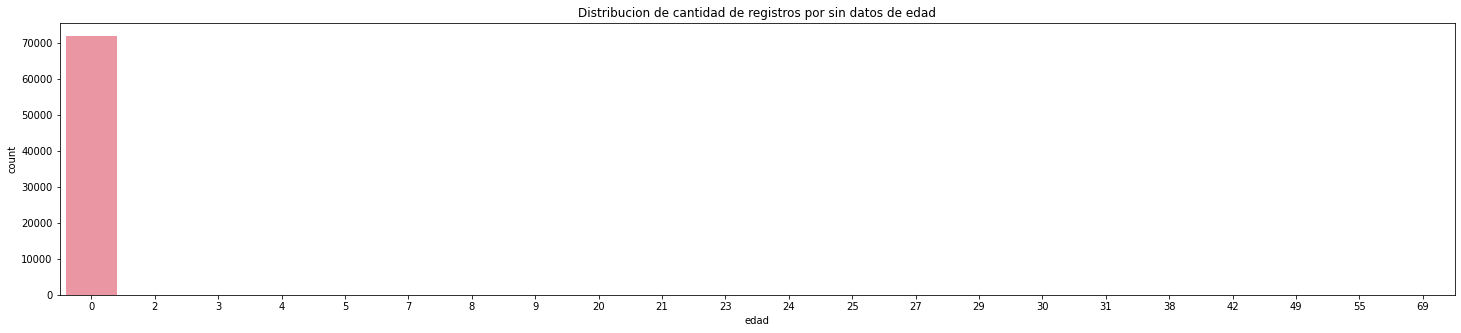

In [37]:
#al ver q existen unidades de meses, dias y horas se procede a revisar la variable edad para estas unidades
plt.figure(figsize=(25,5))
meses = sns.countplot(df20[df20['unidad_edad']=='Meses']['edad'])
plt.title('Distribucion de cantidad de registros por meses de edad')
plt.show()

plt.figure(figsize=(25,5))
meses = sns.countplot(df20[df20['unidad_edad']=='Dias']['edad'])
plt.title('Distribucion de cantidad de registros por dias de edad')
plt.show()

plt.figure(figsize=(25,5))
meses = sns.countplot(df20[df20['unidad_edad']=='Horas']['edad'])
plt.title('Distribucion de cantidad de registros por horas de edad')
plt.show()

plt.figure(figsize=(25,5))
meses = sns.countplot(df20[df20['unidad_edad']=='SIN_DATO']['edad'])
plt.title('Distribucion de cantidad de registros por sin datos de edad')
plt.show()

In [83]:
#se procede a normalizar en años la variable de edad, se transformaran las otras unidades de tiempo para tener todo en las mismas unidades de tiempo, posteriormente se procedera a borrar la variable de unidad_edad puesto que será el mismo valor para todos

#primero se reemplaca "SIN_DATO" por "Años", esta categoria no implica mas transformacion para la variable "edad", asi mismo con la categoria "A¤os" que evidentemente es un tema de encoding
df20['unidad_edad'].replace('SIN_DATO', 'Años', inplace=True)
df20['unidad_edad'].replace('A¤os', 'Años', inplace=True)

#se transforman los datos de edad que correspondan a datos en meses, dias y horas
df20['edad_nueva'] = df20.apply(lambda transf: transf['edad'] if transf['unidad_edad'] == 'Años' else
                                               max(math.ceil(transf['edad'] / 12), 1) if transf['unidad_edad'] == 'Meses' else
                                               max(math.ceil(transf['edad'] / 360), 1) if transf['unidad_edad'] == 'Dias' else
                                               max(math.ceil(transf['edad'] / 8640), 1), axis=1)

df20['edad_nueva'] = df20['edad_nueva'].astype(int)

Meses    693
Dias     101
Horas     29
Name: unidad_edad, dtype: int64
--------------------------------------------------


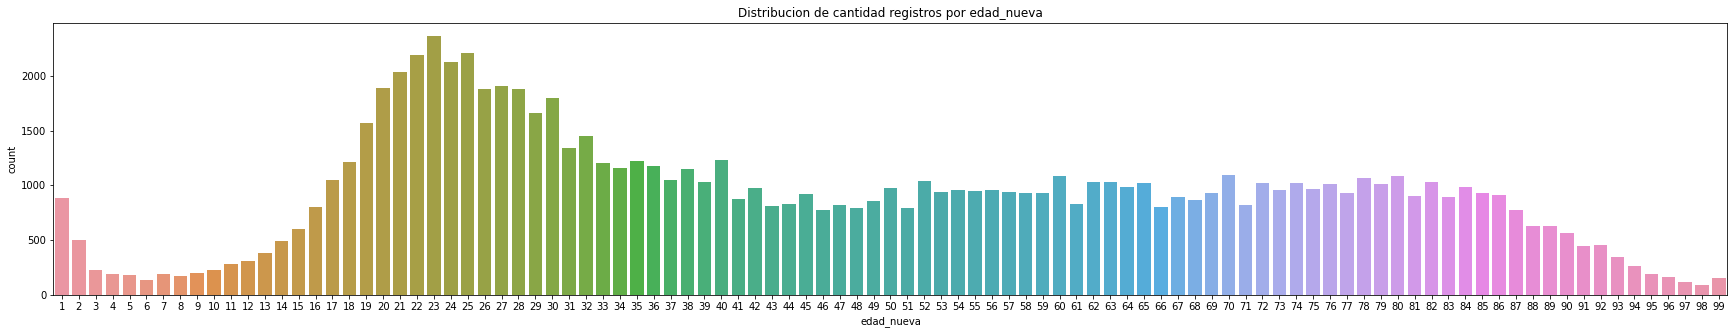

In [92]:
#valido que las unicas edades diferentes entre edad y edad_nueva sean aquellos registros que su unidad_edad sea diferente a "Años"
print(df20[df20['edad_nueva'] != df20['edad']]['unidad_edad'].value_counts())
print('-'* 50)
#vuelvo a graficar la distribucion de cantidad de registros por edad
plt.figure(figsize=(30,5))
sns.countplot(df20[df20['edad_nueva'] > 0]['edad_nueva'])
plt.title('Distribucion de cantidad registros por edad_nueva')
plt.show()

In [97]:
#para simplificar el dataframe de trabajo se procede a remover las columnas "edad" y "unidad_edad", ya que se realizaron las respectivas correcciones con la creacion de la variable "edad_nueva"
df20.drop(columns=['edad','unidad_edad'], inplace=True)

In [98]:
df20

,id,fecha,codigo_localidad,nombre_localidad,genero,red,tipo_incidente,prioridad,edad_nueva
0,CRU-00650113-20,2020-01-09 00:28:00,8.0,Kennedy,FEMENINO,Sur,Evento Respiratorio,MEDIA,34
1,CRU-00650124-20,2020-01-09 00:29:00,7.0,Bosa,SIN_DATO,Sur,Herido,ALTA,0
2,CRU-00650125-20,2020-01-09 00:32:00,3.0,Santa Fe,SIN_DATO,Norte,Inconsciente / Paro cardiorespiratorio,CRITICA,0
3,CRU-00650126-20,2020-01-09 00:35:00,3.0,Santa Fe,SIN_DATO,Norte,Intento de Suicidio,ALTA,0
4,CRU-00650127-20,2020-01-09 02:02:00,19.0,Ciudad Bolivar,SIN_DATO,Sur,Intento de Suicidio,ALTA,0
...,...,...,...,...,...,...,...,...,...
163389,CRU-00873676-20,2020-12-31 23:39:42,11.0,Suba,F,Norte,Enfermo,MEDIA,67
163390,CRU-00873682-20,2020-12-31 23:49:39,16.0,Puente Aranda,SIN_DATO,Norte,Inconsciente / Paro cardiorespiratorio,CRITICA,0
163391,CRU-00873690-20,2021-01-01 01:42:45,5.0,Usme,SIN_DATO,Sur,S¡ntomas Gastrointestinales,ALTA,0
163392,CRU-00873691-20,2020-12-31 23:53:06,11.0,Suba,M,Norte,Herido,ALTA,61
